# E2 sklearn_classification_models

### 00 package import
#### sklearn(scikit learn) 
* 머신러닝 모델을 위한 패키지
#### sklearn.datasets
* 머신러닝을 위한 데이터셋 (손글씨, 와인, 유방암)
#### sklearn.model_selection 
* 머신러닝 학습에 사용되는 모델관련 패키지
#### sklearn.metrics
* 관련 수학 함수들
#### matplotlib
* plot 관련 패키지

In [1]:
from sklearn.datasets import load_digits,load_wine,load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier,LogisticRegression
import matplotlib.pyplot as plt

## 1-handwirtten digits
### 01 Data load and confirm
* load_digits() : 손글씨 데이터를 load 구조화된 데이터
* load_digits().data : 학습할 이미지 데이터 8*8 이미지
* load_digits().label : 학습할 이미지의 라벨 숫자 0~9로 구성
* train_test_split : sklearn 패키지의 학습용 데이터 분할 함수

In [2]:
data = load_digits()

In [3]:
print(data.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
image_data = data.data

In [5]:
image_label = data.target

In [6]:
labels = data.target_names

In [7]:
x_train, x_test, y_train, y_test = train_test_split(image_data, image_label, test_size=0.2)

### 02 model building and predict
* decisiontreeclassifier, randomforestcalssifier svm, sgd classifier, logisticregression 5개의 모델로 예측
* model.fit(x_train, y_train) : 학습
* model.predict(x_test) : 학습된 모델로 예측
* classification_report : classifier 모델의 각 라벨별 예측 정확도 (precision recall f1 support)
    - support 는 각 클래스의 발생횟수
* confusion_matrix : 혼동행렬 각 label 별 예측 정확도 확인
* ConfusionMatirxDisplay : 혼동행렬 시각화
#### precision, recall, f1, support , accuracy
* precision(정밀도) : TP/(TP + FP) 모델이 참이라고 분류한 것 중 실제 참의 비율
* recall(재현율) : TP/(TP + FN) 실제 참 중 모델이 참이라고 분류한 것의 비율
* f1 : 정밀도와 재현율의 조화평균
* support : TP의 수
* accuracy : 전체 데이터중에 실제 참인데 모델이 참이라고 한 것과 실제 거짓인데 모델이 거짓이라고 한 것의 비율

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        37
           1       0.82      0.79      0.81        39
           2       0.88      0.91      0.90        33
           3       0.76      0.71      0.74        35
           4       0.89      0.89      0.89        37
           5       0.82      0.82      0.82        34
           6       0.90      0.92      0.91        39
           7       0.73      0.87      0.79        31
           8       0.84      0.77      0.81        35
           9       0.79      0.78      0.78        40

    accuracy                           0.84       360
   macro avg       0.84      0.84      0.84       360
weighted avg       0.84      0.84      0.84       360



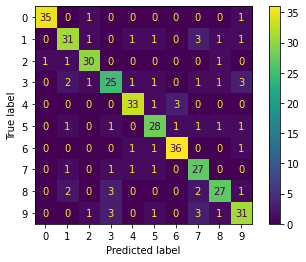

In [8]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
disp.plot()

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       0.97      1.00      0.99        39
           2       1.00      0.97      0.98        33
           3       0.97      0.91      0.94        35
           4       1.00      1.00      1.00        37
           5       0.94      0.94      0.94        34
           6       1.00      1.00      1.00        39
           7       0.97      1.00      0.98        31
           8       0.94      0.91      0.93        35
           9       0.88      0.90      0.89        40

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



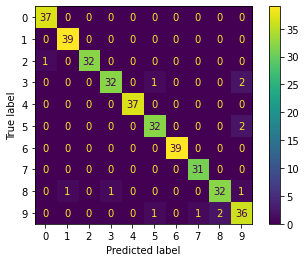

In [9]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
disp.plot()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.97      1.00      0.99        39
           2       0.97      1.00      0.99        33
           3       1.00      0.94      0.97        35
           4       1.00      0.97      0.99        37
           5       0.94      0.97      0.96        34
           6       1.00      1.00      1.00        39
           7       1.00      1.00      1.00        31
           8       0.94      0.97      0.96        35
           9       0.97      0.95      0.96        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



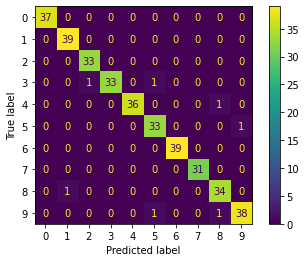

In [10]:
svm_clf = svm.SVC()
svm_clf.fit(x_train, y_train)
y_pred = svm_clf.predict(x_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
disp.plot()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.87      0.88        39
           2       1.00      0.97      0.98        33
           3       0.97      0.91      0.94        35
           4       1.00      0.95      0.97        37
           5       0.97      0.94      0.96        34
           6       1.00      1.00      1.00        39
           7       1.00      1.00      1.00        31
           8       0.85      1.00      0.92        35
           9       0.90      0.93      0.91        40

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



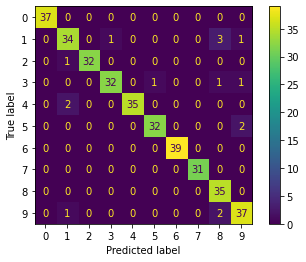

In [11]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
disp.plot()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.87      0.88        39
           2       1.00      0.97      0.98        33
           3       0.97      0.91      0.94        35
           4       1.00      0.95      0.97        37
           5       0.97      0.94      0.96        34
           6       1.00      1.00      1.00        39
           7       1.00      1.00      1.00        31
           8       0.85      1.00      0.92        35
           9       0.90      0.93      0.91        40

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


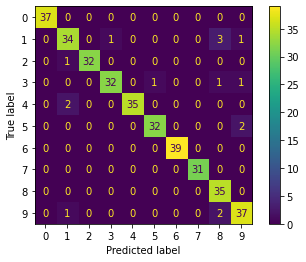

In [12]:
logi = LogisticRegression()
logi.fit(x_train, y_train)
y_pred_ = logi.predict(x_test) 

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
disp.plot()

### 03 conclusion
* Decision Tree, Random Forest, SVM, SGD, Logistic Regression의 F1 기준 89,97,99,96,96 으로 SVM의 정확도가 가장 높게 나옴
* 위 결과는 random state값에 따라 달라질 수 있음
* confucion matrix를 보면 주로 7,8,9 에서 에러가 많이 생기는 것을 확인

## 2-wine recognition
### 01 Data load and confirm
* load_wine() : 와인 데이터를 load 구조화된 데이터
* load_wine().data : 학습할 데이터 13개의 속성으로 구성
* load_wine().label : 학습할 데이터 라벨 0~2 3개 클래스
* train_test_split : sklearn 패키지의 학습용 데이터 분할 함수

In [13]:
data = load_wine()

In [14]:
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [15]:
numeric_data = data.data

In [16]:
numeric_label = data.target

In [17]:
labels = data.target_names

In [18]:
x_train, x_test, y_train, y_test = train_test_split(numeric_data, numeric_label, test_size=0.2)

### 02 model building and predict
* decisiontreeclassifier, randomforestcalssifier svm, sgd classifier, logisticregression 5개의 모델로 예측
* model.fit(x_train, y_train) : 학습
* model.predict(x_test) : 학습된 모델로 예측
* classification_report : classifier 모델의 각 라벨별 예측 정확도 (precision recall f1 support)
    - support 는 각 클래스의 발생횟수
* confusion_matrix : 혼동행렬 각 label 별 예측 정확도 확인
* ConfusionMatirxDisplay : 혼동행렬 시각화
#### precision, recall, f1, support , accuracy
* precision(정밀도) : TP/(TP + FP) 모델이 참이라고 분류한 것 중 실제 참의 비율
* recall(재현율) : TP/(TP + FN) 실제 참 중 모델이 참이라고 분류한 것의 비율
* f1 : 정밀도와 재현율의 조화평균
* support : TP의 수
* accuracy : 전체 데이터중에 실제 참인데 모델이 참이라고 한 것과 실제 거짓인데 모델이 거짓이라고 한 것의 비율

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.91      0.91      0.91        11
           2       0.92      1.00      0.96        11

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



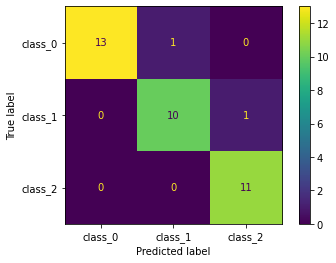

In [19]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
disp.plot()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        11

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



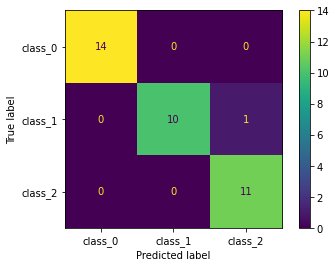

In [20]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
disp.plot()

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.47      0.64      0.54        11
           2       0.33      0.27      0.30        11

    accuracy                           0.61        36
   macro avg       0.60      0.59      0.59        36
weighted avg       0.63      0.61      0.62        36



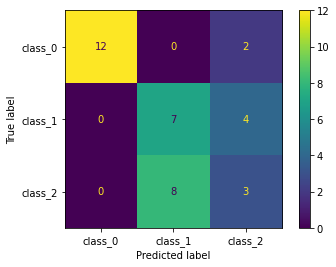

In [21]:
svm_clf = svm.SVC()
svm_clf.fit(x_train, y_train)
y_pred = svm_clf.predict(x_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
disp.plot()

              precision    recall  f1-score   support

           0       0.61      1.00      0.76        14
           1       1.00      0.36      0.53        11
           2       0.78      0.64      0.70        11

    accuracy                           0.69        36
   macro avg       0.80      0.67      0.66        36
weighted avg       0.78      0.69      0.67        36



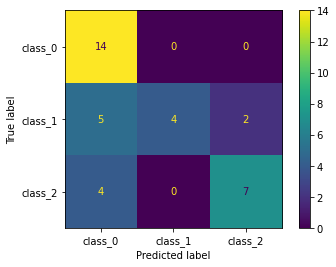

In [22]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
disp.plot()

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.91      0.91      0.91        11
           2       0.92      1.00      0.96        11

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


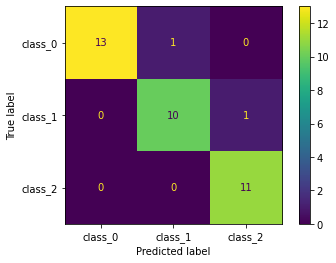

In [23]:
logi = LogisticRegression()
logi.fit(x_train, y_train)
y_pred = logi.predict(x_test) 

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
disp.plot()

### 03 conclusion
* Decision Tree, Random Forest, SVM, SGD, Logistic Regression의 F1 기준 86,94,69,67,92 으로 Random Foreset의 정확도가 가장 높게 나옴
* 위 결과는 random state값에 따라 달라질 수 있음
* confucion matrix를 보면 주로 class 1 에서 에러가 많이 생기는 것을 확인

## 3-wine recognition
### 01 Data load and confirm
* load_breast_cancer() : 유방암의 load 구조화된 데이터
* load_breast_cancer().data : 학습할 데이터 30개의 속성으로 구성
* load_breast_cancer().label : 학습할 데이터 라벨 0~1 2개 클래스
* train_test_split : sklearn 패키지의 학습용 데이터 분할 함수

In [24]:
data = load_breast_cancer()

In [25]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [26]:
numeric_data = data.data

In [27]:
numeric_label = data.target

In [28]:
labels = data.target_names

In [29]:
x_train, x_test, y_train, y_test = train_test_split(numeric_data, numeric_label, test_size=0.2)

### 02 model building and predict
* decisiontreeclassifier, randomforestcalssifier svm, sgd classifier, logisticregression 5개의 모델로 예측
* model.fit(x_train, y_train) : 학습
* model.predict(x_test) : 학습된 모델로 예측
* classification_report : classifier 모델의 각 라벨별 예측 정확도 (precision recall f1 support)
    - support 는 각 클래스의 발생횟수
* confusion_matrix : 혼동행렬 각 label 별 예측 정확도 확인
* ConfusionMatirxDisplay : 혼동행렬 시각화
#### precision, recall, f1, support , accuracy
* precision(정밀도) : TP/(TP + FP) 모델이 참이라고 분류한 것 중 실제 참의 비율
* recall(재현율) : TP/(TP + FN) 실제 참 중 모델이 참이라고 분류한 것의 비율
* f1 : 정밀도와 재현율의 조화평균
* support : TP의 수
* accuracy : 전체 데이터중에 실제 참인데 모델이 참이라고 한 것과 실제 거짓인데 모델이 거짓이라고 한 것의 비율

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        44
           1       0.93      0.93      0.93        70

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



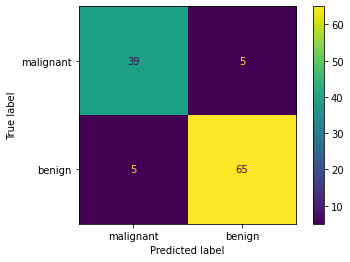

In [30]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
disp.plot()

              precision    recall  f1-score   support

           0       0.98      0.91      0.94        44
           1       0.95      0.99      0.97        70

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



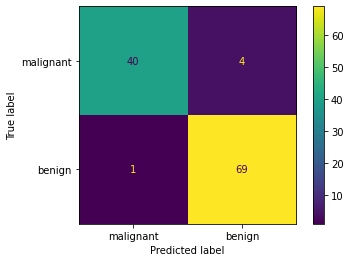

In [31]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
disp.plot()

              precision    recall  f1-score   support

           0       1.00      0.86      0.93        44
           1       0.92      1.00      0.96        70

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



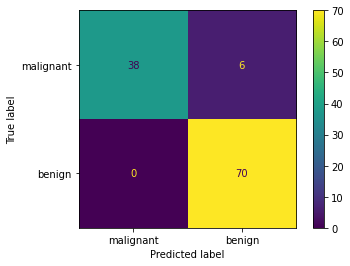

In [32]:
svm_clf = svm.SVC()
svm_clf.fit(x_train, y_train)
y_pred = svm_clf.predict(x_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
disp.plot()

              precision    recall  f1-score   support

           0       0.97      0.73      0.83        44
           1       0.85      0.99      0.91        70

    accuracy                           0.89       114
   macro avg       0.91      0.86      0.87       114
weighted avg       0.90      0.89      0.88       114



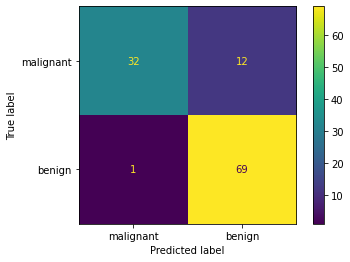

In [33]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
disp.plot()

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        44
           1       0.96      0.93      0.94        70

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


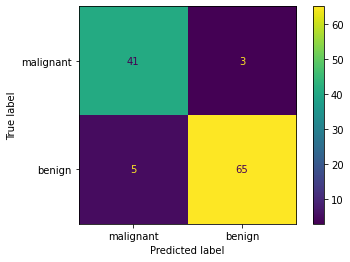

In [34]:
logi = LogisticRegression()
logi.fit(x_train, y_train)
y_pred = logi.predict(x_test) 

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
disp.plot()

### 03 conclusion
* Decision Tree, Random Forest, SVM, SGD, Logistic Regression의 F1 기준 92,97,91,85,94 으로 Random Foreset의 정확도가 가장 높게 나옴
* 위 결과는 random state값에 따라 달라질 수 있음
* confucion matrix를 보면 주로 양성에서(예측) 에러가 많이 생기는 것을 확인

### 04 Result
* 각 프로젝트 별로 모델별 성능이 조금씩 차이남(이미지 자료, 숫자형 자료)
* 각 프로젝트 별로 precision이나 recall 등 중요하게 봐야하는 지표가 달라지기 때문에 도메인 지식 필요
* 도메인 지식과 종합적인 지표 비교를 통한 모델 선정이 중요함